In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#import sklearn
from sklearn import datasets, model_selection, linear_model, metrics, preprocessing, neighbors, tree, ensemble, svm


In [72]:
iris_data = datasets.load_iris()

print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [73]:
x = pd.DataFrame(iris_data.data, columns =iris_data.feature_names)
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [74]:
x = pd.DataFrame(iris_data.data, columns =iris_data.feature_names)


y = pd.DataFrame(iris_data.target, columns = ['labels'])

#x
y

,labels
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [75]:
x, y = datasets.load_iris(return_X_y = True)


x.shape, y.shape

((150, 4), (150,))

In [76]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.1, 
                                                  random_state=42, stratify=y) #seed


#from sklearn.model_selection import train_test_split


In [77]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((135, 4), (15, 4), (135,), (15,))

## Linear Regression (Regression)

In [78]:
x, y = datasets.load_diabetes(return_X_y=True)
x.shape, y.shape

((442, 10), (442,))

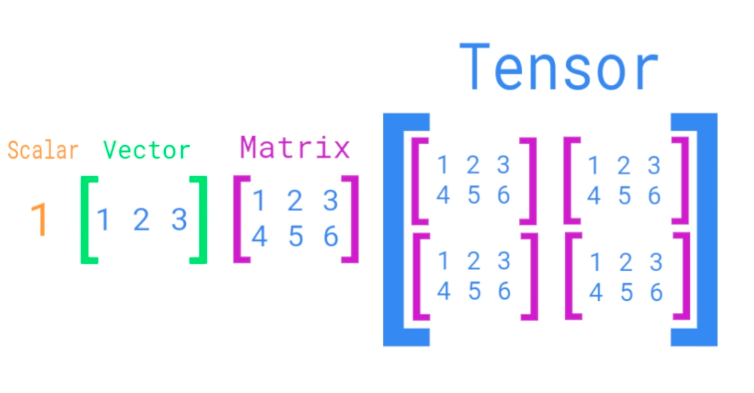

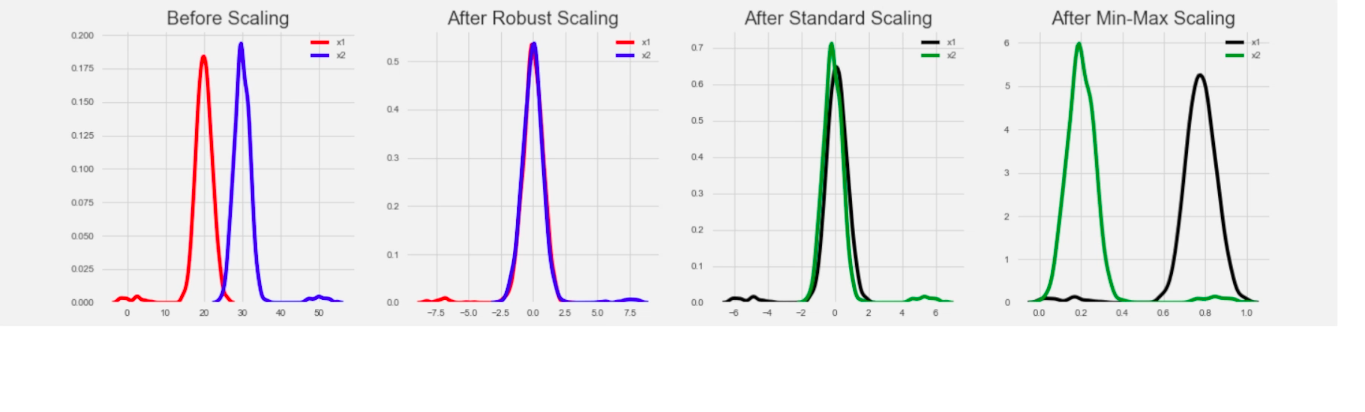

In [79]:
y_normalize = preprocessing.MinMaxScaler()

y_norm = y_normalize.fit_transform(y.reshape(-1, 1))
#reshape(len(y_test),1)

x_normalize = preprocessing.StandardScaler()
x_norm = x_normalize.fit_transform(x)

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
 
#from sklearn.preprocessing import StandardScaler , MinMaxScaler

sc = MinMaxScaler()

y_norm = sc.fit_transform(y.reshape(-1, 1))

scx = StandardScaler()

x_norm = scx.fit_transform(x)

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


y_normalize = preprocessing.MinMaxScaler()
y_normalize = MinMaxScaler()

y_norm = y_normalize.fit_transform(y.reshape(-1, 1))

x_normalize = preprocessing.StandardScaler()
x_normalize = StandardScaler()

x_norm = x_normalize.fit_transform(x)

In [82]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.1, 
                                                  random_state=42) 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((397, 10), (45, 10), (397,), (45,))

In [83]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_norm, y_norm.reshape(-1), test_size = 0.1, 
                                                  random_state=42) 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((397, 10), (45, 10), (397,), (45,))

In [84]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_norm, y, test_size = 0.1, 
                                                  random_state=42) 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((397, 10), (45, 10), (397,), (45,))

In [85]:
r = linear_model.LinearRegression()
r.fit(x_train, y_train)

LinearRegression()

In [86]:
y_pred = r.predict(x_test)

In [87]:
print("Accuracy --> ", r.score(x_test, y_test)*100)


Accuracy -->  55.14200923362627


In [88]:
error_score = metrics.r2_score(y_test, y_pred)

In [89]:
print('R squared error : ', error_score *100)

R squared error :  55.14200923362627


## Logistic Regression (Classification)

In [90]:
x, y = datasets.load_breast_cancer(return_X_y=True)
x.shape, y.shape

((569, 30), (569,))

In [91]:
x_normalize = preprocessing.StandardScaler()
x_norm = x_normalize.fit_transform(x)
#from sklearn.preprocessing import StandardScaler

In [92]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x_norm, y, test_size = 0.1, random_state=42, stratify=y) 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((512, 30), (57, 30), (512,), (57,))

In [93]:
c = linear_model.LogisticRegression()
c.fit(x_train, y_train)

LogisticRegression()

In [94]:
y_pred = c.predict(x_test)

In [95]:
print(f'accuracy_score: {metrics.accuracy_score(y_test, y_pred)}')

cm = metrics.confusion_matrix(y_test, y_pred)


tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1,0]


print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')



print(f'precision_score1: {metrics.precision_score(y_test, y_pred)}')

prec = tp/(tp+fp)

print(f'precision_score2: {prec}')

print(f'recall_score: {metrics.recall_score(y_test, y_pred)}')

rec = tp/(tp+fn)

print(f'recall_score: {rec}')

#metrics.plot_confusion_matrix(c, x_test, y_test)

accuracy_score: 0.9649122807017544
True Positive: 35
True Negative: 20
False Positive: 1
False Negative: 1
precision_score1: 0.9722222222222222
precision_score2: 0.9722222222222222
recall_score: 0.9722222222222222
recall_score: 0.9722222222222222


# Model Evaluation


For Classification

$$Precision = \dfrac{TP}{TP + FP}$$

$$Recall = \dfrac{TP}{TP + FN}$$

$$F1 = 2 \cdot \dfrac{Precision \cdot Recall}{Precision + Recall}$$

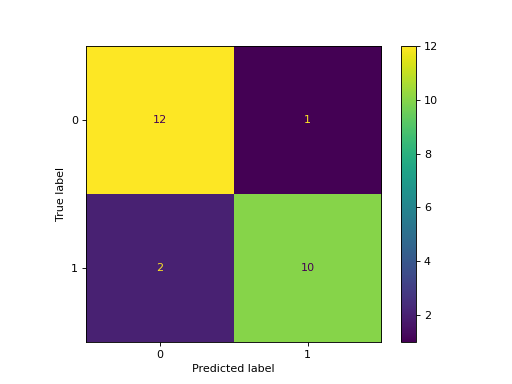

## KNN (Classification)

In [96]:
x, y = datasets.load_breast_cancer(return_X_y=True)

x_normalize = preprocessing.StandardScaler()
x_norm = x_normalize.fit_transform(x)
x.shape, y.shape, x_norm.shape

((569, 30), (569,), (569, 30))

In [97]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x_norm, y, test_size = 0.1, random_state=42, stratify=y) 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((512, 30), (57, 30), (512,), (57,))

In [98]:
k = neighbors.KNeighborsClassifier(n_neighbors=3)
k.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [99]:
y_pred = k.predict(x_test)

In [100]:
print(metrics.accuracy_score(y_test, y_pred)*100)

98.24561403508771


In [101]:
print('Accuracy_score : ', metrics.accuracy_score(y_test, y_pred)*100)

Accuracy_score :  98.24561403508771


## Dicision Tree (Classification & Regression)

In [110]:
x, y = datasets.load_diabetes(return_X_y=True) #load_iris #load_diabetes

x_normalize = preprocessing.StandardScaler()
x_norm = x_normalize.fit_transform(x)
x.shape, y.shape, x_norm.shape

((442, 10), (442,), (442, 10))

In [115]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x_norm, y, test_size = 0.1, random_state=42) 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((397, 10), (45, 10), (397,), (45,))

In [117]:
cl = tree.DecisionTreeRegressor()
cl.fit(x_train, y_train)

DecisionTreeRegressor()

In [118]:
y_pred = cl.predict(x_test)

In [120]:
metrics.accuracy_score(y_test, y_pred)

0.0

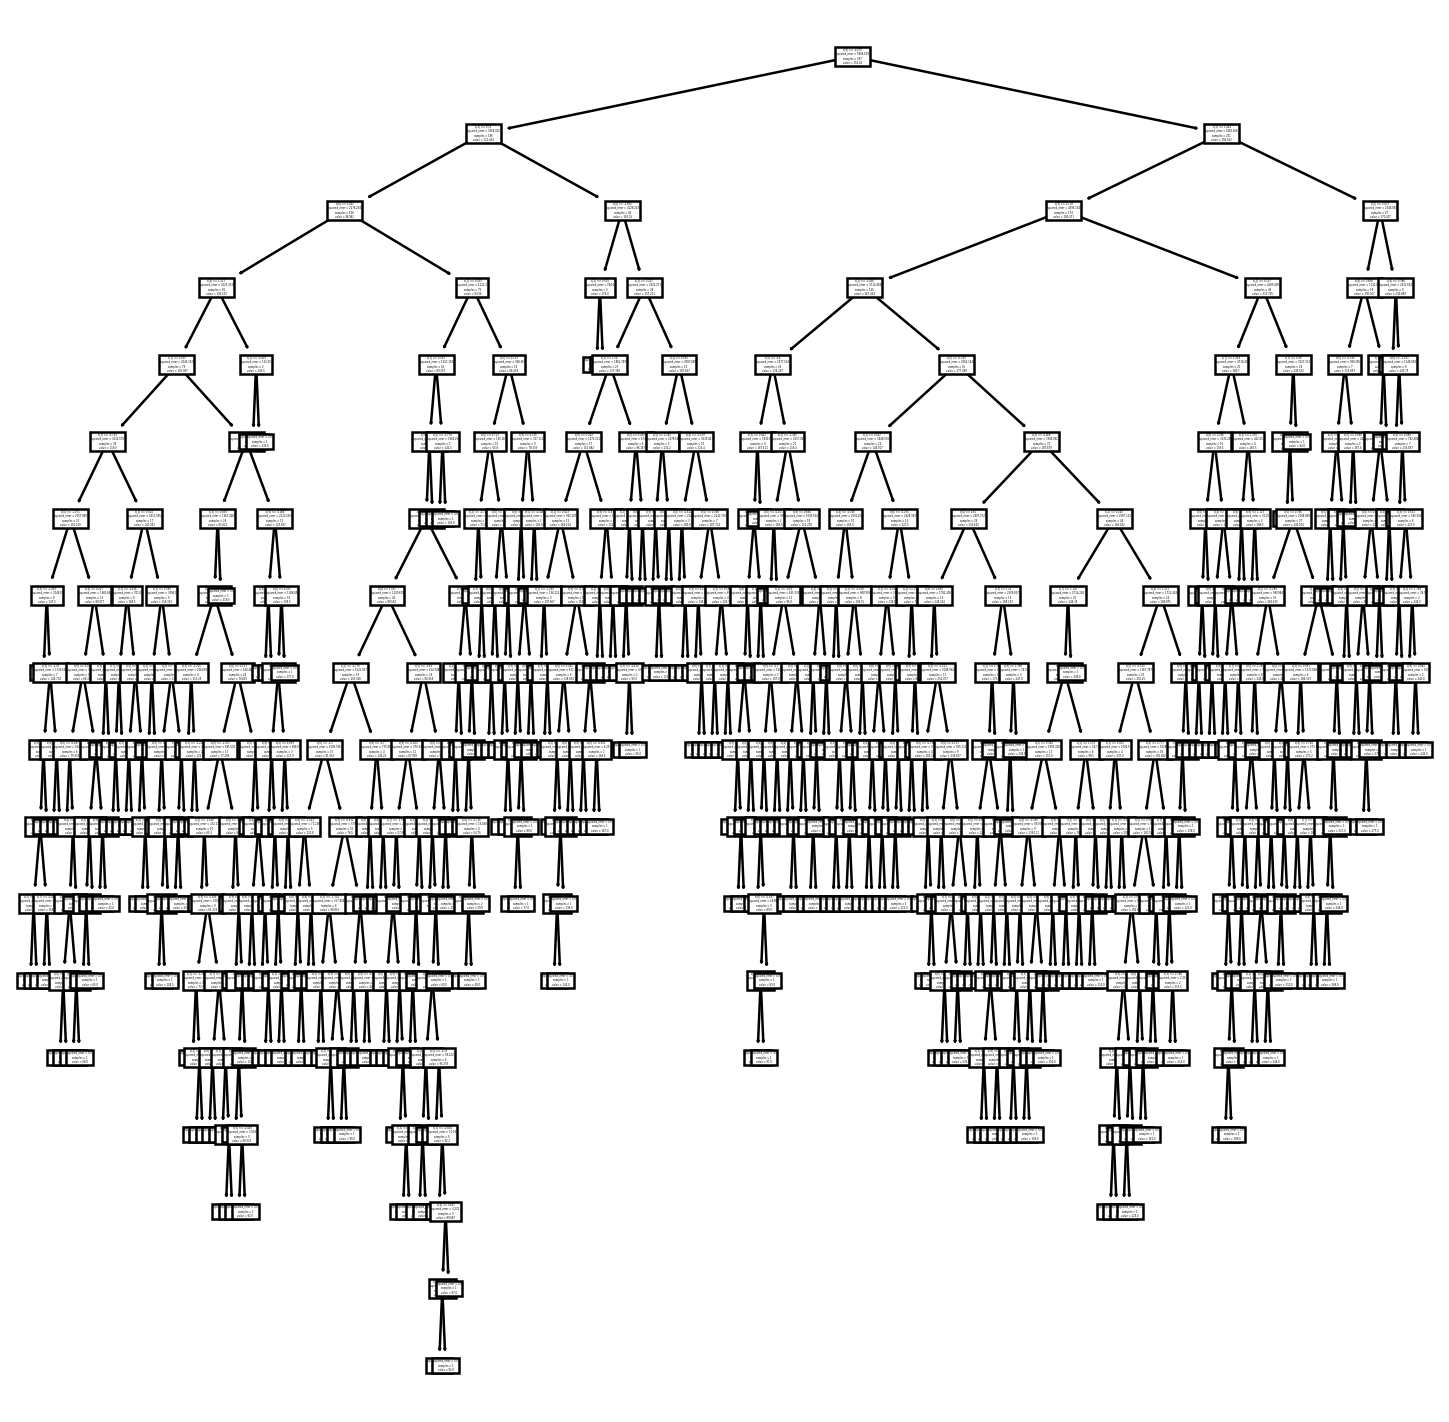

In [121]:

plt.figure(figsize=(10, 10), dpi= 180)
tree.plot_tree(cl)  
plt.show()

## Random Forest (Classification & Regression)

In [129]:
x, y = datasets.load_iris(return_X_y=True) #load_iris

x.shape, y.shape

((150, 4), (150,))

In [130]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x, y, test_size = 0.1, random_state=42, stratify=y) 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((135, 4), (15, 4), (135,), (15,))

In [131]:
clf = ensemble.RandomForestClassifier(random_state=42, n_estimators=100, 
                                      max_depth= 5, n_jobs= -1)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=42)

In [132]:
y_pred = clf.predict(x_test)

In [133]:
metrics.accuracy_score(y_test, y_pred)

0.9333333333333333

## Support Vector Machine (Classification & Regression)

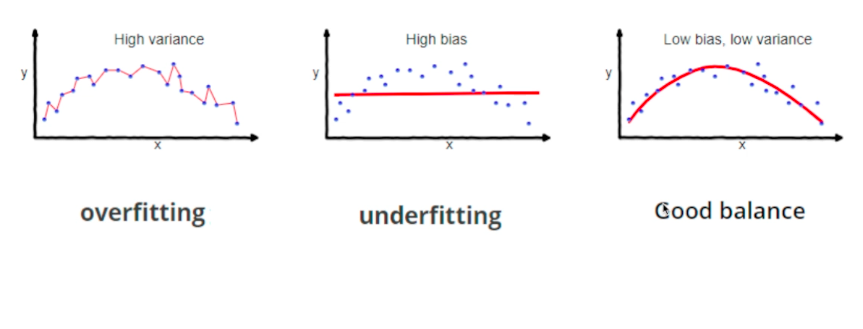

In [134]:
x, y = datasets.load_breast_cancer(return_X_y=True) #load_iris

x.shape, y.shape

((569, 30), (569,))

In [135]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x, y, test_size = 0.1, random_state=42, stratify=y) 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((512, 30), (57, 30), (512,), (57,))

In [148]:
clf = svm.SVC(kernel="linear")
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [149]:

#classifier = SVC(kernel = 'rbf', random_state = 0) #default
#classifier = SVC(kernel = 'poly', random_state = 0)
#classifier = SVC(kernel = 'sigmoid', random_state = 0)

In [150]:
y_pred = clf.predict(x_test)

In [151]:
print(metrics.accuracy_score(y_test, y_pred)*100)

96.49122807017544


In [152]:
x, y = datasets.fetch_california_housing(return_X_y=True)
x.shape, y.shape

((20640, 8), (20640,))

In [153]:
y_mean = y.mean()
y_std = y.std()
y_norm = (y-y_mean)/y_std

x_mean = x.mean()
x_std = x.std()

x_norm = (x-x_mean)/x_std

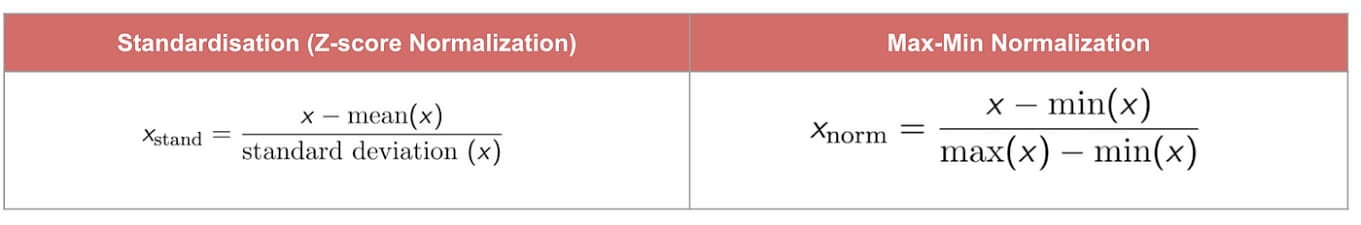

In [154]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x_norm, y_norm, test_size = 0.2, random_state=42) 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [155]:
model = svm.SVR()
model.fit(x_train, y_train)


SVR()

In [156]:
y_pred = model.predict(x_test)

In [157]:
metrics.mean_squared_error(y_test, y_pred)

0.9960435093953233

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [ ]:
#https://vitalflux.com/minmaxscaler-standardscaler-python-examples/#:~:text=Differences%20between%20MinMaxScaler%20and%20StandardScaler&text=MinMaxScaler%20scales%20the%20data%20to,zero%20mean%20and%20unit%20variance.

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html